# Install libraries

In [2]:
!pip install deepface
!pip install opencv-python
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=80d6ecc3379bb55b92489d982eae3a02912bce7113ed0bca26c317eb4d12ea53
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


# Import libraries

In [1]:
from deepface import DeepFace
import cv2
import os
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
%matplotlib inline

# Create a dataset

In [2]:
idendities = {
    "Angelina": ["img1.jpg", "img2.jpg", "img4.jpg", "img5.jpg", "img6.jpg", "img7.jpg", "img10.jpg", "img11.jpg"],
    "Scarlett": ["img8.jpg", "img9.jpg"],
    "Jennifer": ["img3.jpg", "img12.jpg"],
    "Mark": ["img13.jpg", "img14.jpg", "img15.jpg"],
    "Jack": ["img16.jpg", "img17.jpg"],
    "Elon": ["img18.jpg", "img19.jpg"],
    "Jeff": ["img20.jpg", "img21.jpg"],
    "Marissa": ["img22.jpg", "img23.jpg"],
    "Sundar": ["img24.jpg", "img25.jpg"]
}

## postive images

In [3]:
positives = []

for key, values in idendities.items():
    
    #print(key)
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            positive = []
            positive.append(values[i])
            positive.append(values[j])
            positives.append(positive)

In [4]:
positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["Decision"] = "Yes"

## negative images

In [5]:
samples_list = list(idendities.values())
negatives = []

for i in range(0, len(idendities) - 1):
    for j in range(i+1, len(idendities)):
        cross_product = itertools.product(samples_list[i], samples_list[j])
        cross_product = list(cross_product)
        
        for cross_sample in cross_product:
            negative = []
            negative.append(cross_sample[0])
            negative.append(cross_sample[1])
            negatives.append(negative)

In [6]:
negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["Decision"] = "No"

## Merging

In [7]:
df = pd.concat([positives, negatives]).reset_index(drop = True)
df.head()

,file_x,file_y,Decision
0,img1.jpg,img2.jpg,Yes
1,img1.jpg,img4.jpg,Yes
2,img1.jpg,img5.jpg,Yes
3,img1.jpg,img6.jpg,Yes
4,img1.jpg,img7.jpg,Yes


# Building models

In [4]:
models = ["VGG-Face","Facenet","Facenet512","OpenFace","DeepFace","ArcFace"]
distances =["cosine","euclidean","euclidean_l2"]

In [5]:
# Create a DataFrame to store the results
models_results = pd.DataFrame()

# Function to compute verification results for a given image pair
def compute_verification_result(row):
    image_x_path = os.path.join("./images", row['file_x'])
    image_y_path = os.path.join("./images", row['file_y'])

    result = DeepFace.verify(image_x_path, image_y_path, model_name=row['model'], distance_metric=row['distance'])

    return pd.Series({'verified': result['verified'], 'distance': result['distance']})

# Apply the function to each row of the DataFrame
result_columns = ['verified', 'distance']

for model_name in models:
    for dist in distances:
        df['model'] = model_name
        df['distance'] = dist

        results = df.apply(compute_verification_result, axis=1)

        models_results[f'verified_{model_name}_{dist}'] = results['verified']
        models_results[f'distance_{model_name}_{dist}'] = results['distance']

# Reset 'model' and 'distance' columns in the original DataFrame (if needed)
df.drop(columns=['model', 'distance'], inplace=True)

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:02<00:00, 239MB/s]  


facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:00<00:00, 285MB/s]


facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /root/.deepface/weights/facenet512_weights.h5
100%|██████████| 95.0M/95.0M [00:00<00:00, 248MB/s]


openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: /root/.deepface/weights/openface_weights.h5
100%|██████████| 15.3M/15.3M [00:00<00:00, 132MB/s] 


VGGFace2_DeepFace_weights_val-0.9034.h5 will be downloaded...


Downloading...
From: https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
To: /root/.deepface/weights/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
100%|██████████| 511M/511M [00:01<00:00, 328MB/s]  


arcface_weights.h5  will be downloaded to  /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5
100%|██████████| 137M/137M [00:00<00:00, 322MB/s] 


# Evaluation

In [8]:
def Evaluation (ground_truth, prediction):
    cm = confusion_matrix(ground_truth,prediction)
    true_positive = cm[0,0]
    false_positive = cm[0, 1]
    true_negative = cm[1, 1]
    false_negative = cm[1, 0]
    accuracy = accuracy_score(ground_truth, prediction)

    # Calculate precision, recall, and F1-score
    precision = precision_score(ground_truth, prediction)
    recall = recall_score(ground_truth, prediction)
    f1 = f1_score(ground_truth,prediction)
    # Calculate FAR (False Acceptance Rate)
    far = false_positive / (false_positive + true_negative)

    # Calculate FRR (False Rejection Rate)
    frr = false_negative / (false_negative + true_positive)

    # Calculate EER (Equal Error Rate)
    eer = 0.5 * (far + frr)
    return accuracy,precision,recall,f1,far,frr,eer

In [9]:
df["Decision"] = np.where(df["Decision"] == "Yes", True, False)

In [15]:
models_results

,verified_VGG-Face_cosine,distance_VGG-Face_cosine,verified_VGG-Face_euclidean,distance_VGG-Face_euclidean,verified_VGG-Face_euclidean_l2,distance_VGG-Face_euclidean_l2,verified_Facenet_cosine,distance_Facenet_cosine,verified_Facenet_euclidean,distance_Facenet_euclidean,...,verified_DeepFace_euclidean,distance_DeepFace_euclidean,verified_DeepFace_euclidean_l2,distance_DeepFace_euclidean_l2,verified_ArcFace_cosine,distance_ArcFace_cosine,verified_ArcFace_euclidean,distance_ArcFace_euclidean,verified_ArcFace_euclidean_l2,distance_ArcFace_euclidean_l2
0,True,0.082241,True,0.229328,True,0.405563,True,0.102584,True,5.440650,...,True,54.055346,True,0.607883,True,0.271019,True,2.706000,True,0.736233
1,True,0.231741,True,0.412044,True,0.680796,True,0.202386,True,7.586258,...,True,52.427445,True,0.628206,True,0.218140,True,2.657905,True,0.660515
2,True,0.281104,True,0.486102,True,0.749806,True,0.360699,False,10.504871,...,True,59.768349,False,0.685097,True,0.578196,True,3.869697,True,1.075356
3,True,0.229425,True,0.380507,True,0.677384,True,0.244546,True,8.289305,...,True,38.755315,True,0.473703,True,0.260912,True,2.779331,True,0.722374
4,True,0.081105,True,0.226115,True,0.402753,True,0.092867,True,5.259423,...,True,55.294721,True,0.608859,True,0.386684,True,3.433327,True,0.879414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,False,0.684620,False,0.943445,False,1.170145,False,0.960789,False,16.274604,...,False,75.108880,False,0.819186,False,1.035438,False,11.972198,False,1.439054
296,False,0.494706,True,0.494031,False,0.994692,False,0.401385,True,4.596218,...,False,103.846698,False,1.011996,True,0.023651,True,2.287846,True,0.217490
297,False,0.852018,False,0.730166,False,1.305387,False,0.982448,False,13.096158,...,False,103.526429,False,0.973589,False,1.010660,False,15.196825,False,1.421731
298,False,0.703409,False,0.691579,False,1.186094,False,0.968069,False,13.135137,...,False,78.754000,False,0.787743,False,0.987485,False,7.231875,False,1.405336


In [22]:
accuracies,precisions,recalls,f1scores,far_all,frr_all,eer_all = [],[],[],[],[],[],[]
for i in range(0,36,2):
    accuracy,precision,recall,f1,far,frr,eer = Evaluation (df["Decision"], models_results.iloc[:,i].values)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1scores.append(f1)
    far_all.append(far)
    frr_all.append(frr)
    eer_all.append(eer)

In [23]:
x = ['VGG_cosine','VGG_euclidean','VGG_euclidean_l2',
    'Facenet_cosine','Facenet_euclidean','Facenet_euclidean_l2',
    'Facenet512_cosine','Facenet512_euclidean','Facenet512_euclidean_l2',
    'OpenFace_cosine','OpenFace_euclidean','OpenFace_euclidean_l2',
    'DeepFace_cosine','DeepFace_euclidean','DeepFace_euclidean_l2',
    'ArcFace_cosine','ArcFace_euclidean','ArcFace_euclidean_l2']
y = [accuracies,precisions,recalls,f1scores,frr_all,far_all,eer_all]

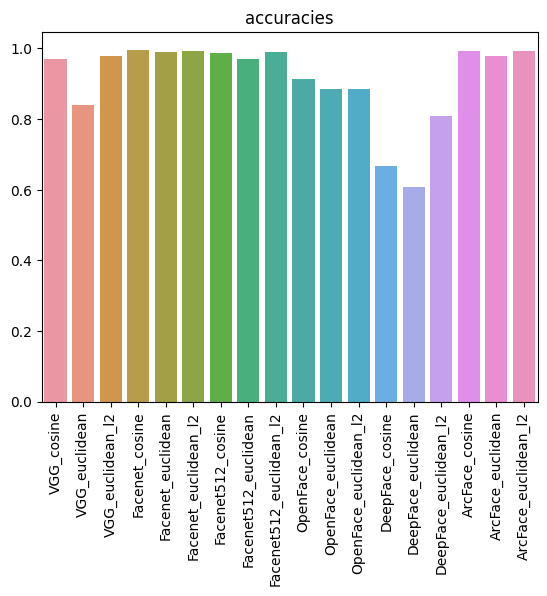

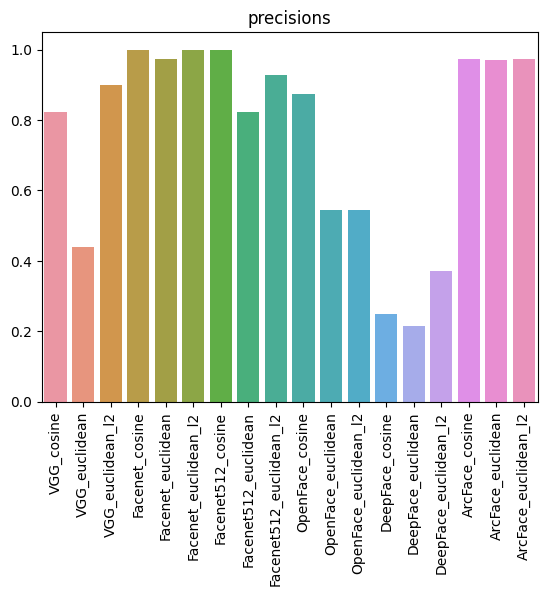

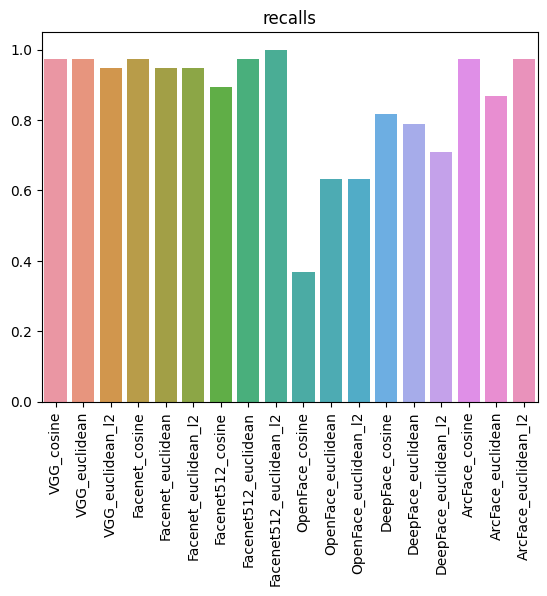

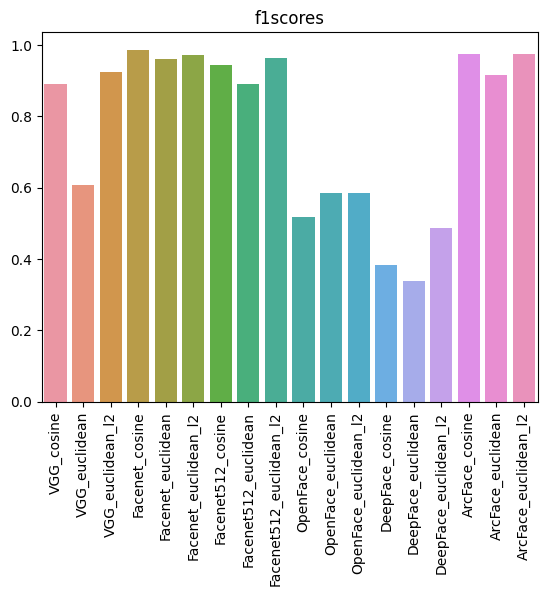

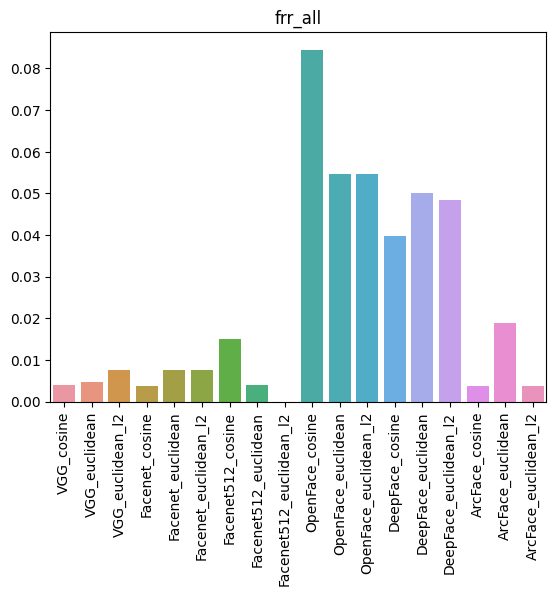

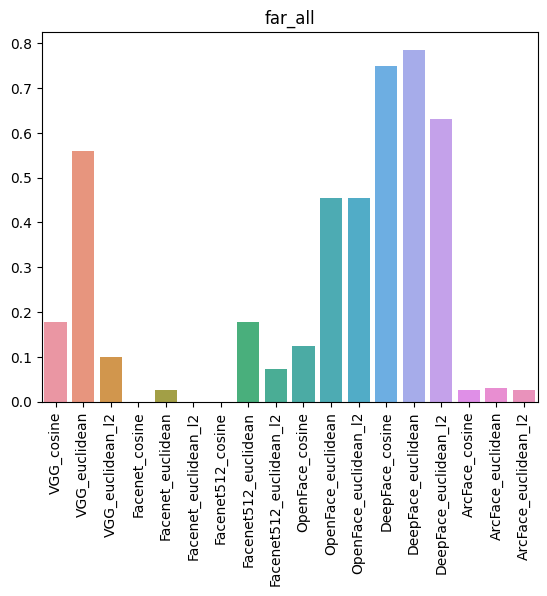

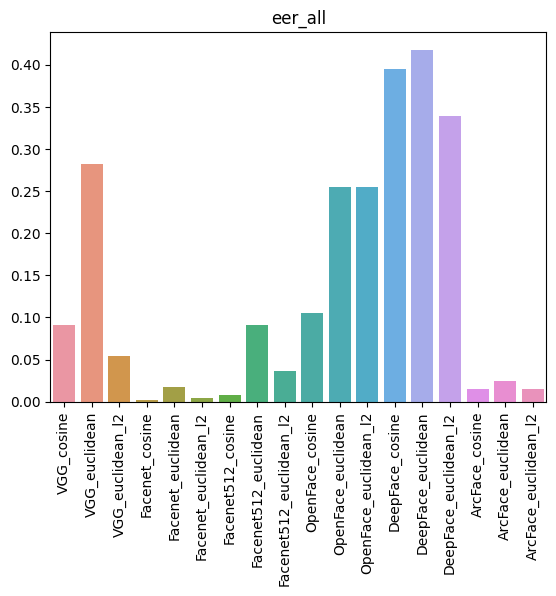

In [34]:
names = ['accuracies','precisions','recalls','f1scores','frr_all','far_all','eer_all']
i = 0
for y in [accuracies,precisions,recalls,f1scores,frr_all,far_all,eer_all]:
    sns.barplot(x= x,y = y)
    plt.xticks(rotation=90)
    plt.title(names[i])
    i+=1
    plt.show()

# Champion model

In [20]:
def FaceMatching (img1_path, img2_path):
    #Read Images
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)
    #Display Images
    plt.imshow(img1[:,:,::-1])
    plt.show()
    plt.imshow(img2[:,:,::-1])
    plt.show()
    #Verify
    verify = DeepFace.verify(img1_path,img2_path,model_name = 'Facenet',distance_metric='cosine')
    verification = verify['verified']
    #Printing Output
    if verification:
        print(True)
    else:
        print(False)
    return verify

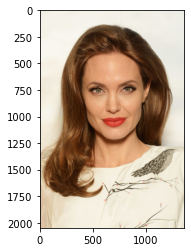

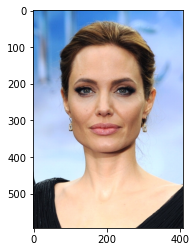

True


{'verified': True,
 'distance': 0.20997969097649083,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 315, 'y': 457, 'w': 746, 'h': 746},
  'img2': {'x': 56, 'y': 108, 'w': 280, 'h': 280}},
 'time': 17.2}

In [21]:
FaceMatching (os.path.join("./images", df.file_x[25]), os.path.join("./images", df.file_y[25]))

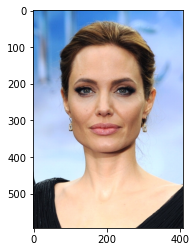

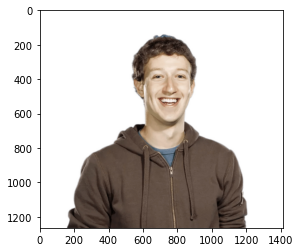

False


{'verified': False,
 'distance': 1.1310848447522326,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 56, 'y': 108, 'w': 280, 'h': 280},
  'img2': {'x': 573, 'y': 251, 'w': 355, 'h': 355}},
 'time': 0.86}

In [22]:
FaceMatching (os.path.join("./images", df.file_x[90]), os.path.join("./images", df.file_y[90]))